_Reading this on GitHub? [Check out the README in this folder (`/notebooks`)][README]
for instructions on how to run this notebook using the Advanced Analytics Workspace!_

# ESTMA Payments by Entity and Payment Type

Let's recreate the breakdown that drives the payments chart on our website, so
that we can see the amount and types of payments reporting entities are making
each year.

[README]: https://github.com/StatCan/hackathon-ginyu-force-data/tree/main/notebooks#running-these-notebooks-on-aaw

In [1]:
import ipywidgets as widgets
import pandas as pd
import plotly.express as px

# Label for all entity rollup option in the dropdown below.
LBL_ALL_ENT = '(All Entities)'


## Load the Data

We can fetch the data directly from the main branch of the Open ESTMA Data
repository. We'll pull it straight into a Pandas data frame. Then we can use it
to get:

- A list of unique entities for our dropdown menu
- The payment breakdown (as a new data frame) to feed our charts

In [2]:
df = pd.read_csv(
    "https://github.com/StatCan/hackathon-ginyu-force-data/raw/main/estma-payments.csv")

# Get unique entities
entity_list = sorted(df['entity'].unique())

df.set_index("entity", inplace=True)

# Create payment breakdown
per_entity_df = df.groupby([
    'entity',
    'reporting_cycle',
    'payment_category'
]).agg(
    amount_reported_cad=('amount_reported_cad', 'sum')
)

per_entity_df.head(10)

amount_reported_cad
entity                                   reporting_cycle payment_category                                        
11272420 Canada Inc.                     2019            Royalties                                       790619.0
                                                         Taxes                                           535573.0
1192090 B.C. Unlimited Liability Company 2016            Bonuses                                         420000.0
                                                         Fees                                           4360000.0
                                                         Infrastructure Improvement Payments             110000.0
                                                         Royalties                                     54500000.0
                                                         Taxes                                         95860000.0
                                         2017            Fees                                          14150862.0
                                                         Infrastructure Improvement Payments              30090.0
                                                         Royalties                                     11161521.0

## Dropdown Menu

We already have most of the data structures we need! Let's display a dropdown so
so we can choose which reporting entity to use when rendering the chart.

In [3]:
w = widgets.Dropdown(
    options=[LBL_ALL_ENT] + entity_list,
    value=LBL_ALL_ENT,
    description='Entity:',
)
display(w)


Dropdown(description='Entity:', options=('(All Entities)', '11272420 Canada Inc.', '1192090 B.C. Unlimited Lia…

## Chart Visualization

We're ready to render the chart! We just need to do some minor data
transformation depending on what's selected above.

- For single entities, we only take the rows for that entity
- For the rollup, we re-aggregate across all entities

In either case, the result can be fed into Plotly to render the result!

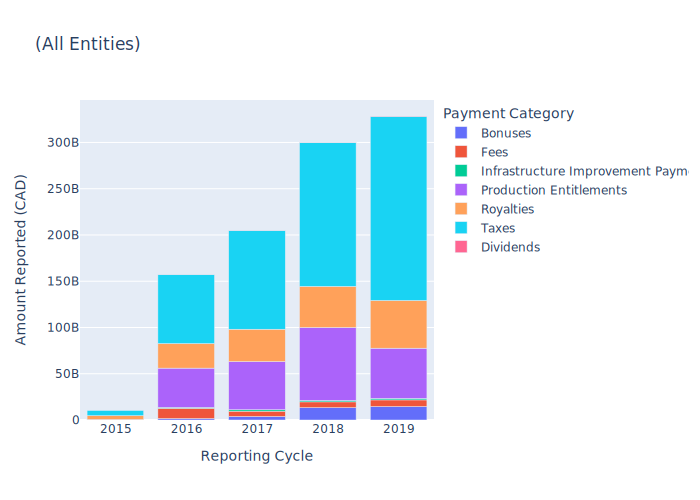

In [4]:
# Re-aggregate or filter as necessary
entity_df = per_entity_df.groupby([
    'reporting_cycle',
    'payment_category'
]).agg(
    amount_reported_cad=('amount_reported_cad', 'sum')
) if w.value == LBL_ALL_ENT else per_entity_df.loc[w.value]
entity_df = entity_df.reset_index()

# Configure and render the chart
fig = px.bar(
    entity_df,
    x='reporting_cycle',
    y='amount_reported_cad',
    color='payment_category',
    title=w.value,
    labels={
        'reporting_cycle': 'Reporting Cycle',
        'amount_reported_cad': 'Amount Reported (CAD)',
        'payment_category': 'Payment Category'
    }
)
fig.show(renderer='svg')
